in [`gmx editconf`](https://manual.gromacs.org/current/onlinehelp/gmx-editconf.html) command<br>
`-d` arg determined the Distance between the solute and the box<br>
we want fix the system atom number by adjust the `-d` value<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
pdbid = "6jkn"

In [3]:
def get_n_sol(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top > /dev/null 2>&1
    sol = !grep "SOL" topol.top
    n_sol = int(sol[0].split()[1])
    return n_sol

In [4]:
def get_box(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron >editconf.txt 2>&1
    volume = !grep "new box volume" editconf.txt
    volume = float(volume[0].split()[4])
    return volume

In [5]:
def get_n_atoms(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top >solvate.txt 2>&1
    atoms = !grep "Solvent box contains" solvate.txt
    n_atoms = int(atoms[0].split()[3])
    return n_atoms

### Plot d v.s. Volume (linear)

In [ ]:
!rm \#topol.top* \#{pdbid}*
d2volume = {}
for d in tqdm(np.linspace(1.0, 1.4, 21)):
    volume = get_box(d)
    d2volume[np.round(d, decimals=15)] = volume

In [ ]:
plt.plot(d2volume.keys(), d2volume.values())
plt.scatter(d2volume.keys(), d2volume.values())
plt.xlabel('d')
plt.ylabel('volume')

### Plot d v.s. n_sol (non-linear)
in wtTel22, we want fix n_sol = **3854**

In [10]:
!rm \#topol.top* \#{pdbid}*
d2n_sol = {}
for d in tqdm(np.linspace(1.22, 1.32, 51)):
    n_sol = get_n_sol(d)
    d2n_sol[np.round(d, decimals=15)] = n_sol

100%|██████████| 51/51 [00:43<00:00,  1.17it/s]


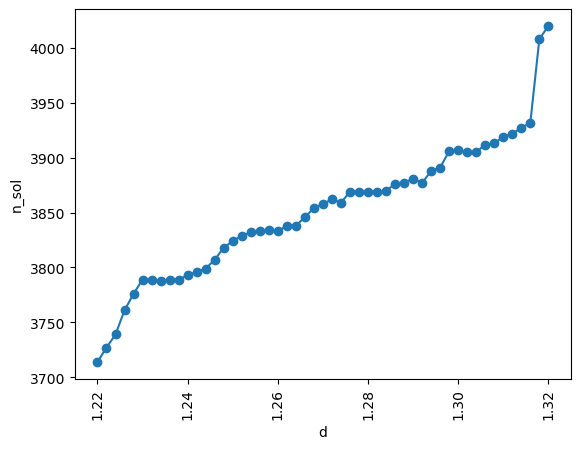

In [11]:
plt.plot(d2n_sol.keys(), d2n_sol.values())
plt.scatter(d2n_sol.keys(), d2n_sol.values())
plt.xlabel('d')
plt.ylabel('n_sol')
plt.xticks(rotation=90)
plt.show()

In [12]:
d2n_sol

{1.22: 3714,
 1.222: 3727,
 1.224: 3739,
 1.226: 3761,
 1.228: 3776,
 1.23: 3789,
 1.232: 3789,
 1.234: 3788,
 1.236: 3789,
 1.238: 3789,
 1.24: 3793,
 1.242: 3796,
 1.244: 3799,
 1.246: 3807,
 1.248: 3818,
 1.25: 3824,
 1.252: 3829,
 1.254: 3832,
 1.256: 3833,
 1.258: 3834,
 1.26: 3833,
 1.262: 3838,
 1.264: 3838,
 1.266: 3846,
 1.268: 3854,
 1.27: 3858,
 1.272: 3862,
 1.274: 3859,
 1.276: 3869,
 1.278: 3869,
 1.28: 3869,
 1.282: 3869,
 1.284: 3870,
 1.286: 3876,
 1.288: 3877,
 1.29: 3881,
 1.292: 3877,
 1.294: 3888,
 1.296: 3891,
 1.298: 3906,
 1.3: 3907,
 1.302: 3905,
 1.304: 3905,
 1.306: 3912,
 1.308: 3913,
 1.31: 3919,
 1.312: 3922,
 1.314: 3927,
 1.316: 3932,
 1.318: 4008,
 1.32: 4020}